In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sympy as sp


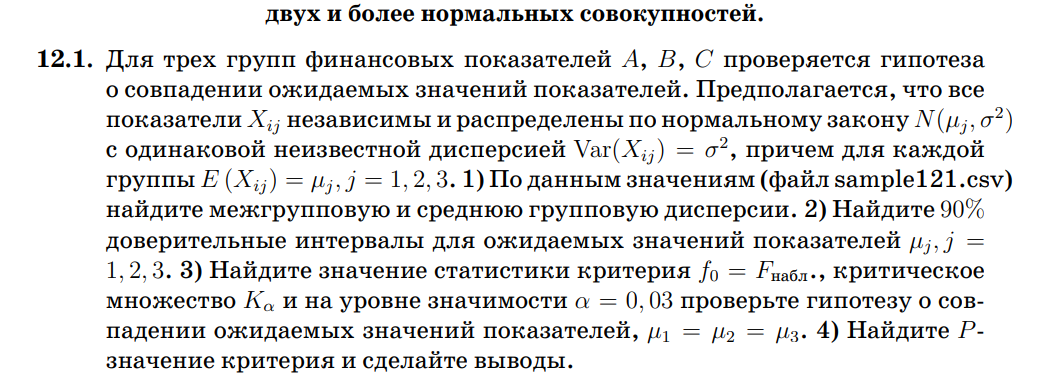

In [189]:
sample = pd.read_csv('sample121.csv', header = None, encoding='cp1251', decimal = ',', sep = ';')
sample.head()

,0,1,2
0,0.240756,0.564998,1.830014
1,-1.537147,1.086975,3.524825
2,0.354049,1.079226,-0.259285
3,0.874066,0.176824,3.860822
4,2.272462,0.534980,2.378388


In [190]:
A_group = sample[0].dropna()
B_group = sample[1].dropna()
C_group = sample[2].dropna()
A_var = A_group.var(ddof = 0)
B_var = B_group.var(ddof = 0)
C_var = C_group.var(ddof = 0)
sr_gr = (A_var * A_group.size + B_var * B_group.size + C_var * C_group.size)/(sum([A_group.size, \
                                                                                  B_group.size,\
                                                                                 C_group.size]));
print(f'Средняя групповая дисперсия равна: {sr_gr}')

Средняя групповая дисперсия равна: 2.553429733071954


In [191]:
concatenated = pd.concat([A_group, B_group, C_group], ignore_index= True)
gen_sov_mean = concatenated.mean(); gen_sov_mean
#mezh_gr = (gen_sov_mean - A_group.mean())**2 * A_group.size
mezh_gr = np.array(list(map(lambda x:(gen_sov_mean - x.mean())**2 * x.size, [A_group, B_group, C_group]\
                           ))).sum()/concatenated.size;
print(f'Межгрупповая дисперсия равна: {mezh_gr}')

Межгрупповая дисперсия равна: 0.4516834264461738


In [192]:
N = sum([A_group.size, B_group.size, C_group.size])
MSE = N * sr_gr / (N - 3)
MSE

2.6237076156335677

In [193]:
def Confidence_Interval(sample, alpha, И):
    mean = sample.mean()
    n = sample.size
    MSE = N * sr_gr / (N - 3)
    pp = st.t(N-3).isf(alpha/2)
    
    upper_border = mean + pp * np.sqrt(MSE / n)
    lower_border = mean - pp * np.sqrt(MSE / n)
    return lower_border, upper_border

In [194]:
arr = [Confidence_Interval(x , 0.1, N) for x in [A_group,B_group,C_group]]

In [195]:
arr

[(0.7608935299044453, 1.7765407871320538),
 (0.0011040917863092137, 0.9366496599101128),
 (1.673157134041437, 2.425709677073053)]

In [196]:
k = 3
alpha = 0.03
F_stat = (concatenated.size - 3) * mezh_gr / ((k-1) * sr_gr)
F = st.f(k - 1, concatenated.size - k)
pvalue = F.sf(F_stat);
pp = F.isf(alpha)
print(f'F_набл = {F_stat}, pvalue = {pvalue}, K = ({pp}, +{np.inf})')

F_набл = 9.640659549969604, pvalue = 0.00013958472886728196, K = (3.621823534571484, +inf)


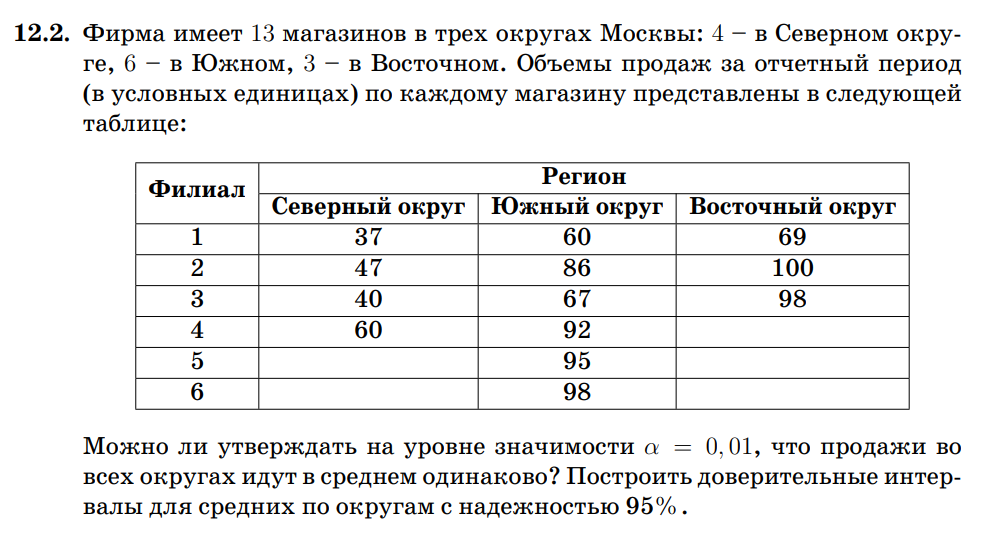

In [197]:
north = np.array([37, 47, 40, 60])
south = np.array([60, 86, 67, 92, 95, 98])
east = np.array([69, 100, 98])
n_mean = north.mean()
s_mean = south.mean()
e_mean = east.mean()
N = np.array([4, 6, 3])
alpha = 0.01
k = 3

In [198]:
gen_sov = np.array(north.tolist() + south.tolist() + east.tolist())
gen_sov_mean = gen_sov.mean()
mezh_gr = np.array(list(map(lambda x:(gen_sov_mean - x.mean())**2 * x.size, [north, south, east]\
                           ))).sum()/gen_sov.size
sr_gr = (north.var() * N[0] + south.var() * N[1] + east.var() * N[2])/sum(N)
F = st.f(2, gen_sov.size - 3)

In [199]:
F_stat = (gen_sov.size - 3) * mezh_gr / ((k-1) * sr_gr); F_stat

9.916666666666666

In [200]:
pvalue = F.sf(F_stat); pvalue

0.0042314683517178575

In [201]:
pp = F.isf(alpha)

In [202]:
print(f'F_набл = {F_stat}, pvalue = {pvalue}, K = ({pp}, +{np.inf})')

F_набл = 9.916666666666666, pvalue = 0.0042314683517178575, K = (7.559432157547899, +inf)


In [203]:
N = N.sum(); N

13

In [204]:
arr1 = [Confidence_Interval(x, 0.05, N) for x in [north, south, east]]

In [205]:
arr1

[(29.62659020984559, 62.37340979015441),
 (69.63116688821037, 96.36883311178963),
 (70.0936149002046, 107.9063850997954)]

**#12.3**

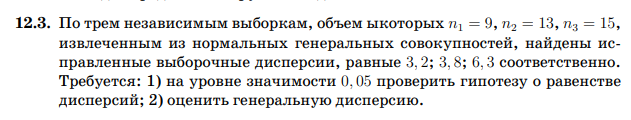

In [290]:
N = np.array([9, 13, 15])
var = np.array([3.2, 3.8, 6.3])
alpha = 0.05

In [291]:
nu = np.array([(x-1) for x in N])

In [292]:
gamma = 1 + 1/(3*(N.size-1)) * (sum([1/x for x in nu]) - 1/(sum(nu)))

In [293]:
S = (nu.reshape(-1, 1) * var.reshape(-1,1)).sum()/sum(nu); S

4.688235294117646

In [294]:
M = sum(nu) * np.log(S) - (nu.reshape(-1, 1) * np.log(var).reshape(-1, 1)).sum()

In [295]:
Chi_stat = M/gamma; Chi_stat

1.3813607623081026

In [298]:
pvalue = st.chi2(2).sf(Chi_stat); pvalue

0.5012349222294392

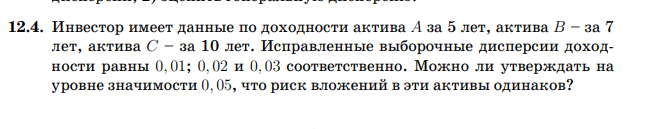

In [299]:
N = np.array([5, 7, 10])
var = np.array([0.01, 0.02, 0.03])
k = 3
alpha = 0.05

In [300]:
nu = np.array([(x-1) for x in N])

In [301]:
gamma = 1 + 1/(3*(N.size-1)) * (sum([1/x for x in nu]) - 1/(sum(nu)))

In [302]:
S = (nu.reshape(-1, 1) * var.reshape(-1,1)).sum()/sum(nu); S

0.022631578947368423

In [303]:
M = sum(nu) * np.log(S) - (nu.reshape(-1, 1) * np.log(var).reshape(-1, 1)).sum()

In [304]:
Chi_stat = M/gamma; Chi_stat

1.3640475758603445

In [305]:
pvalue = st.chi2(2).sf(Chi_stat); pvalue

0.5055927437917568